In [27]:
from nltk.corpus import gutenberg
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# gutenberg 의 file ids 가져와서 출력

In [28]:
for file in gutenberg.fileids():
    print(file)

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [29]:
# chesterton-brown.txt
# doyle_fear.txt

In [30]:
stop_words = set(stopwords.words('english')) # Stop word 가져오기

In [31]:
tokenizer = RegexpTokenizer(r'\w+') #문장기호 제거하기
a = gutenberg.raw('chesterton-brown.txt') #브라운 소설 읽어오기
word_gu = tokenizer.tokenize(a.lower()) #제거된 브라운


In [37]:
len(word_gu)

73288

In [38]:
tokenizer = RegexpTokenizer(r'\w+') #문장기호 제거하기
mycor = 'C:\world_news'
files = PlaintextCorpusReader(mycor , '.*')
a = files.raw('doyle_fear.txt') #돌레 소설 읽어오기
word_do = tokenizer.tokenize(a.lower()) #제거된 돌레

In [39]:
len(word_do)

62055

# punctuation 제거와 Stopword 제거

In [40]:
def preprocess(sentence):
	sentence = sentence.lower()
	tokenizer = RegexpTokenizer(r'\w+')
	tokens = tokenizer.tokenize(sentence)
	filtered_words = [w for w in tokens if not w in stopwords.words('english')]
	return " ".join(filtered_words)

# 상위 50개 만들기 with and without stop word

In [41]:
word_gu_TopWith = dict(nltk.FreqDist(word_gu).most_common(50))
word_do_TopWith = dict(nltk.FreqDist(word_do).most_common(50))

In [42]:
word_gu_TopWith

{'the': 4670,
 'and': 2221,
 'a': 2132,
 'of': 2093,
 'to': 1391,
 'he': 1357,
 'in': 1253,
 'was': 1145,
 'i': 1093,
 'it': 983,
 'his': 965,
 'that': 930,
 'with': 737,
 'but': 692,
 'you': 692,
 'as': 630,
 'had': 523,
 'on': 464,
 'is': 457,
 'at': 439,
 's': 438,
 'for': 416,
 'said': 416,
 'him': 376,
 'like': 331,
 'not': 326,
 'man': 308,
 'be': 306,
 't': 296,
 'or': 295,
 'this': 294,
 'have': 292,
 'brown': 291,
 'one': 283,
 'by': 275,
 'all': 273,
 'there': 265,
 'if': 244,
 'which': 242,
 'were': 241,
 'an': 241,
 'they': 239,
 'father': 231,
 'from': 231,
 'more': 228,
 'so': 211,
 'my': 207,
 'out': 206,
 'up': 197,
 'what': 194}

In [43]:
filtered_word_gu = []
filtered_word_do = []

In [44]:
for w in word_gu:
    if w not in stop_words:
        filtered_word_gu.append(w)
for w in word_do:
    if w not in stop_words:
        filtered_word_do.append(w)
        

In [45]:
word_gu_TopWithout = dict(nltk.FreqDist(filtered_word_gu).most_common(50))
word_do_TopWithout = dict(nltk.FreqDist(filtered_word_do).most_common(50))

In [46]:
n_sep = 5000

In [47]:
# D를 만드는 함수,n_sep = 나눌 수 , ind = 검색할 word들 , words=검색 대상 원본 데이터
def makeD(n_sep , ind , words):
    df = pd.DataFrame()
    temp = ''
    for i in range(0, len(words) // n_sep + 1):
        for j in range(n_sep):
            if i * n_sep + j < len(words):
                temp += words[i * n_sep + j] +' '
        df = df.append({'title': temp , 'Dim': i}, ignore_index=True)
        temp = ''
    return df

In [48]:
# key 랑 데이터 넣으면 key 의 단어가 몇번 나왔는지 DataFrame 으로 Return 한다.
def dispMatrix(ind , df):
    countvec = CountVectorizer(min_df=0.5 , analyzer='word' , token_pattern = r'\w+')
    countvec.vocabulary = ind
#     print (countvec)
    return pd.DataFrame(countvec.fit_transform(df.title).toarray(), columns=ind)

In [49]:
ind_gu = word_gu_TopWith.keys()
df_word_gu_TopWith = makeD(n_sep , ind_gu , word_gu)
df_word_gu_TopWith = dispMatrix(ind_gu , df_word_gu_TopWith)

In [50]:
ind_do = word_do_TopWith.keys()
df_word_do_TopWith = makeD(n_sep , ind_do , word_do)
df_word_do_TopWith = dispMatrix(ind_do , df_word_do_TopWith)

In [51]:
df_word_do_TopWith

,the,of,and,a,to,i,it,you,that,he,...,one,my,what,would,by,are,or,been,mcmurdo,well
0,263,124,90,110,95,121,90,81,94,107,...,22,19,26,20,14,19,11,8,0,10
1,358,112,112,113,103,70,110,25,83,67,...,15,9,13,9,25,8,11,35,0,10
2,289,100,102,115,114,61,102,59,94,117,...,17,8,23,21,17,11,15,22,0,20
3,245,113,109,121,99,124,92,76,126,74,...,19,29,22,26,19,25,12,24,0,9
4,298,126,120,101,110,108,96,89,101,71,...,25,26,27,25,22,25,10,14,0,35
5,276,122,140,113,121,171,91,125,90,55,...,22,40,11,18,15,21,16,16,13,13
6,233,122,124,133,91,120,93,141,87,85,...,20,20,22,10,16,20,13,14,39,16
7,277,132,120,105,124,80,90,125,69,80,...,20,16,18,17,22,22,12,13,41,23
8,276,122,150,121,117,122,112,112,100,74,...,18,25,25,27,13,22,12,20,30,25
9,278,138,142,120,126,61,95,86,77,86,...,18,15,13,21,17,15,11,19,31,11


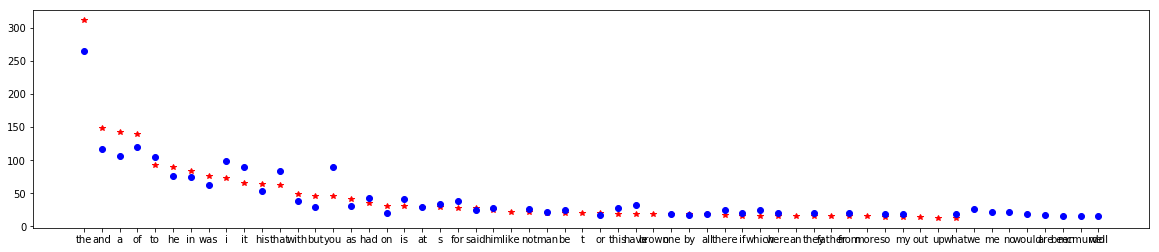

In [56]:
p1 = plt.figure(1)
p1.set_figwidth(20)
plt.plot(df_word_gu_TopWith.mean(), 'r*')
plt.plot(df_word_do_TopWith.mean(), 'bo')

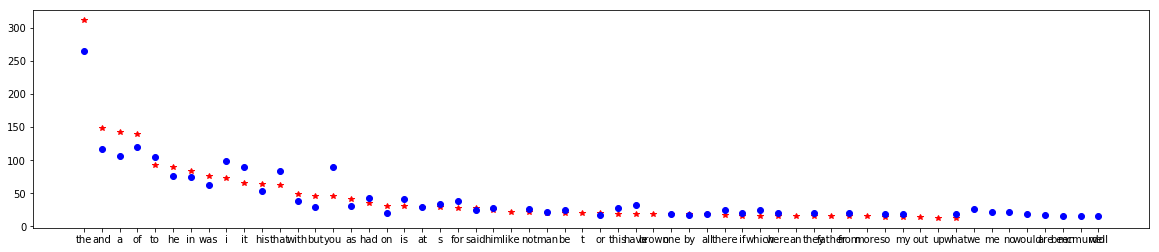

In [21]:
p1 = plt.figure(1)
p1.set_figwidth(20)
plt.plot(ind_gu , df_word_gu_TopWith.mean(), 'r*')
plt.plot(ind_do , df_word_do_TopWith.mean(), 'bo')

In [22]:
ind_gu = list(word_gu_TopWithout.keys())
df_word_gu_TopWithout = makeD(n_sep , ind_gu , word_gu)
df_word_gu_TopWithout = dispMatrix(ind_gu , df_word_gu_TopWithout)

In [23]:
df_word_gu_TopWithout

,said,like,man,brown,one,father,could,know,little,rather,...,came,first,though,room,come,might,must,cried,voice,looking
0,24,20,28,19,19,10,8,8,16,13,...,2,7,5,13,3,5,3,7,2,3
1,23,25,12,12,17,12,7,3,10,6,...,3,8,2,7,4,4,1,11,3,4
2,26,27,19,9,12,10,12,2,9,3,...,4,7,4,3,5,2,9,4,7,1
3,29,25,24,21,26,13,20,9,5,7,...,2,3,5,7,3,2,5,7,5,5
4,40,33,21,27,12,21,13,9,8,8,...,4,7,5,19,3,5,6,3,8,13
5,16,12,30,15,21,14,9,19,6,7,...,5,4,3,3,4,9,8,4,3,3
6,23,29,25,15,25,16,15,13,6,13,...,4,3,4,2,6,5,2,4,6,4
7,19,13,27,20,19,10,10,12,7,11,...,4,7,9,3,5,10,5,2,3,5
8,20,25,23,19,17,14,7,12,10,5,...,3,7,5,2,4,1,6,2,5,1
9,31,23,8,20,21,22,5,12,16,10,...,6,6,6,2,5,5,3,6,9,8


In [24]:
ind_do = list(word_do_TopWithout.keys())
df_word_do_TopWithout = makeD(n_sep , ind_do , word_do)
df_word_do_TopWithout = dispMatrix(ind_do , df_word_do_TopWithout)

In [25]:
df_word_do_TopWithout

,said,man,one,would,mcmurdo,well,mr,holmes,upon,could,...,think,tell,made,take,must,thought,like,heard,last,little
0,20,19,22,20,0,10,17,38,8,6,...,8,4,6,3,4,2,3,3,4,6
1,27,20,15,9,0,10,19,14,21,8,...,2,2,5,1,6,2,6,6,5,4
2,24,26,17,21,0,20,46,25,10,19,...,6,6,7,4,8,3,4,14,2,7
3,27,23,19,26,0,9,14,16,20,16,...,6,4,2,2,4,9,5,7,3,1
4,26,14,25,25,0,35,37,36,19,9,...,4,3,7,2,3,3,7,3,8,8
5,26,27,22,18,13,13,18,13,12,18,...,6,7,7,8,5,3,9,6,8,3
6,28,29,20,10,39,16,12,0,13,11,...,3,10,6,7,5,6,6,5,1,6
7,39,20,20,17,41,23,1,0,8,8,...,6,7,5,7,3,4,3,4,6,3
8,34,27,18,27,30,25,5,0,7,13,...,6,4,5,5,0,9,4,2,10,6
9,14,23,18,21,31,11,3,0,9,15,...,4,3,3,9,2,5,6,3,2,5


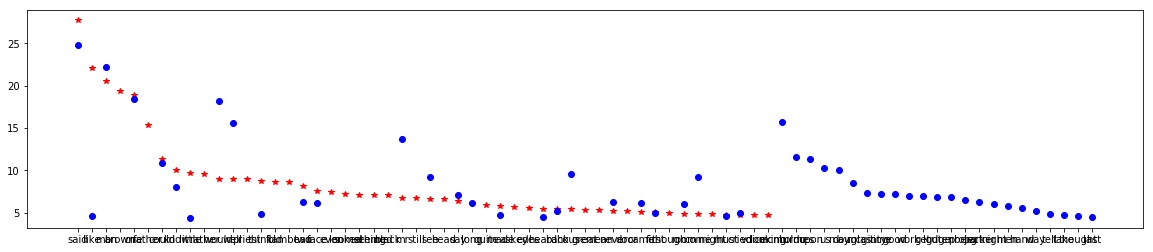

In [26]:
p1 = plt.figure(1)
p1.set_figwidth(20)
plt.plot(ind_gu , df_word_gu_TopWithout.mean(), 'r*')
plt.plot(ind_do , df_word_do_TopWithout.mean(), 'bo')

# 위에거 샘플코드임

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
df = pd.DataFrame({'title':['Delicious boiled egg','Fried egg ','Split orange','Something else'], 'page':[1, 2, 3, 4]})
df.head()
countvec = CountVectorizer()
countvec.fit_transform(df.title)
pd.DataFrame(countvec.fit_transform(df.title).toarray(), columns=countvec.get_feature_names())

,boiled,delicious,egg,else,fried,orange,something,split
0,1,1,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0
2,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,1,0


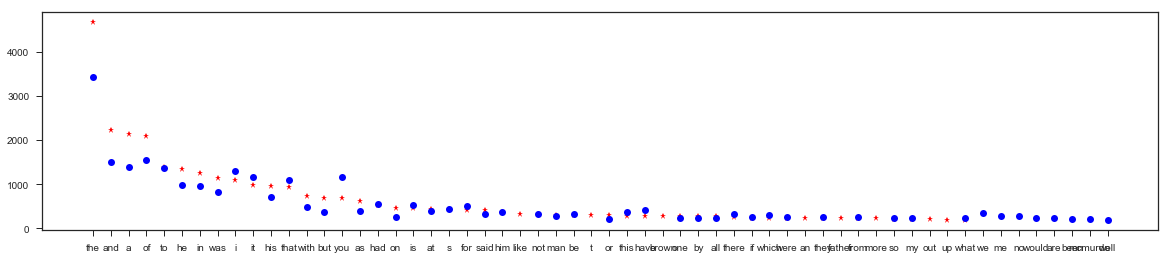

In [109]:
p1 = plt.figure(1)
p1.set_figwidth(20)
plt.plot(word_gu_TopWith.keys() , word_gu_TopWith.values() , 'r*')
plt.plot(word_do_TopWith.keys() , word_do_TopWith.values() , 'bo')

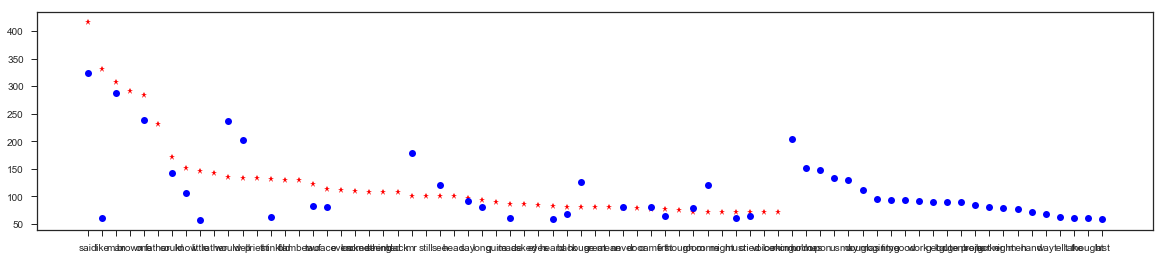

In [108]:
p1 = plt.figure(1)
p1.set_figwidth(20)
plt.plot(word_gu_TopWithout.keys() , word_gu_TopWithout.values() , 'r*')
plt.plot(word_do_TopWithout.keys() , word_do_TopWithout.values() , 'bo')